# Visualiser des principes de base de l'IRM
## Quelques outils pour observer la composition des images du cerveau

Ce notebook présente des exemples d'images IRM utilisant différents types de séquences. Ces images ont pour but de visualiser les différents paramètres de l'IRM et leurs effets sur la représention des tissues.

### Nilearn
Nous utiliserons cette [librairie](https://nilearn.github.io/user_guide.html) pour effectuer l'ensemble du travail. Accédez la documentation pour davantage d'info et d'exemples.

* Nilearn 6.2

In [1]:
!pip show nilearn
# !pip install --upgrade nilearn

Name: nilearn
Version: 0.6.2
Summary: Statistical learning for neuroimaging in Python
Home-page: http://nilearn.github.io
Author: None
Author-email: None
License: new BSD
Location: c:\users\sangfrois\documents\computation\anaconda3\envs\sangfroisenv\lib\site-packages
Requires: joblib, scipy, numpy, nibabel, scikit-learn, sklearn
Required-by: netneurotools


Nilearn est gros, nous pouvons donc n'importer que les parties qui nous intéressent. Nilearn contient le module [`plotting`](https://nilearn.github.io/modules/reference.html#module-nilearn.plotting) nous permettant de tirer profit, en (presqu') une seule ligne de code, d'une vaste gamme de techniques de visualisation. Allez voir la liste, mais commençons par la base.

## Importer les données
On commence par récupérer des données. [Ici](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets), vous avez la liste des jeux de données qui se retrouvent à même la librairie Nilearn. 

Nous choisissons le *template* (modèle) du Montreal Neurological Institute (MNI). Il s'agit, en quelque sorte, d'un cerveau moyen. Ces données représentent l'espace à partir duquel on repère les différentes régions cérébrales.

In [2]:
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009() # mni est un dictionnaire contenant plusieurs objets

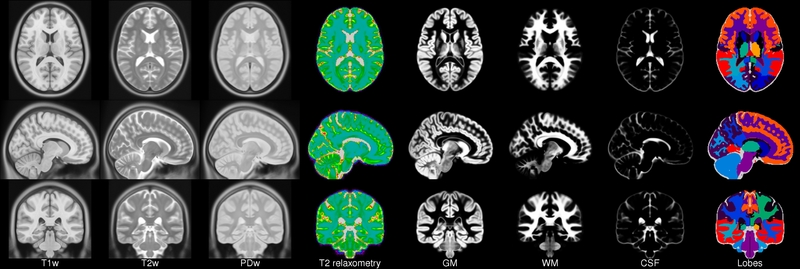

## Images pondérées en T1
On dit plus couramment qu'on utilise une séquence structurelle lorsqu'on regarde ces images. C'est ce qu'on veut dire lorsqu'on parle tout simplement d'une image par Résonance Magnétique.

### Statique
`plot_anat` visualise un scan anatomique. Ici, l'image retourne de façon statique. Nous avons une coordonnée représentée sur les trois coupes. Nous restons donc en deux dimensions.

C'est une image typique de l'anatomie. Nous pouvons bien distinguer les tissue. La matière grise est grise, la blanche est blanche, les ventricules sont noirs (tout comme une partie de la boîte crânienne). Comme on l'a vu, c'est à l'aide de cette pondération que nous pouvons mener des analyses structurelles.

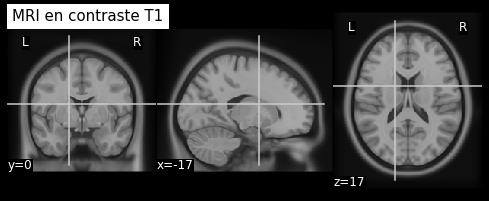

In [4]:
from nilearn.plotting import plot_anat
plot_anat(mni.t1, # mni contient une série de données nommées t1
          cut_coords=[-17, 0, 17], # x, y, z
          title='MRI en contraste T1')

(Pour ceux et celles qui sont curieux.ses, vous avez là un type d'objet qu'on appelle bytes, utilisé pour représenter le spectre noir à blanc sur les trois axes. Les Bytes prennent moins d'espace de stockage)

In [ ]:
mni.t1?

#### Rappel
Coupe par coupe, la bobine va perturber le champs créé par l'aimant. Les valeurs de gris retenues pour représenter le cerveau seront pondérées en considérant le moment du retour à l'équilibre des spins.
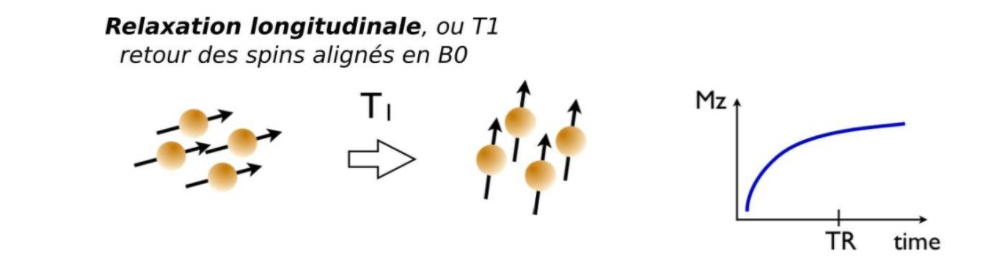

In [12]:
mni.t1

'C:\\Users\\sangfrois/nilearn_data\\icbm152_2009\\mni_icbm152_nlin_sym_09a\\mni_icbm152_t1_tal_nlin_sym_09a.nii.gz'

### Dynamique
`view_img`, quant à lui, nous permet d'interagir avec l'image à l'aide de notre curseur. On peut donc modifier la coordonnée d'origine.

In [13]:
from nilearn.plotting import view_img 
viewer = view_img(mni.t1, bg_img=None, title='MRI en contraste T1', cmap='gray', symmetric_cmap=False, 
                  black_bg=True, threshold=None,)

In [ ]:
viewer.save_as_html('t1.html')

Nous avons accès à des données HTML qui nous permettent d'explorer les trois coupes. 

**[Ouvrez-les](t1.html)** (assurez-vous d'ouvrir ce lien dans un ***nouvel onglet***)

## Images pondérées en T2
Nous utilisons encore la fonction `plot_anat` pour représenter le spectre de noir à blanc (0 à 1) qui nous aide à distinguer les tissues. Le T2 est moins intuitif pour dissocier les tissues; on ne l'utilise pas pour explorer les régions cérébrales. 

On utilise beaucoup la pondération en T2 pour observer l'oxygénation sanguine. On dit plus couramment l'IRMf, une séquence BOLD, etc.

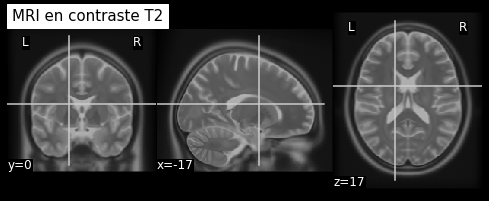

In [14]:
plot_anat(mni.t2, cut_coords=[-17, 0, 17], title='MRI en contraste T2')

#### Rappel
La pondération en T2 considère le déphasage des spins.
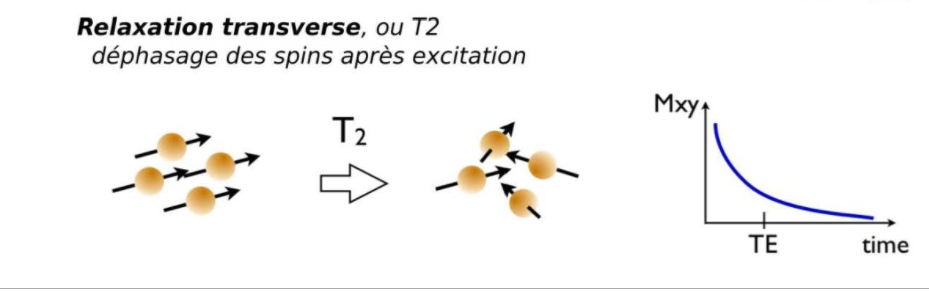

## Images pondérées pour la diffusion (*diffusion weigthed imaging*) 

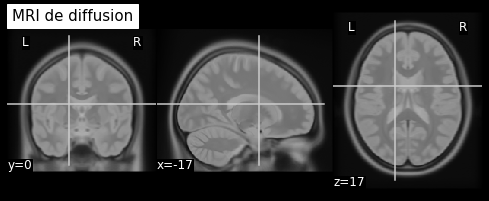

In [23]:
plot_anat(mni.pd, cut_coords=[-17, 0, 17], title='MRI de diffusion')

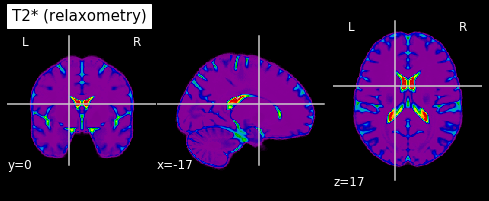

In [36]:
from nilearn.plotting import plot_epi
plot_epi(mni.t2_relax, cut_coords=[-17, 0, 17], title='T2* (relaxometry)')

## Segmentation

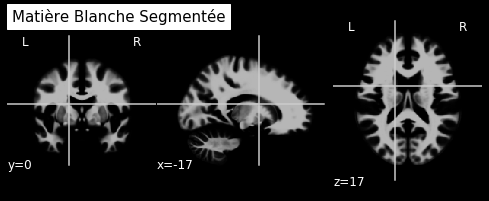

In [25]:
plot_anat(mni.wm, cut_coords=[-17, 0, 17], title='Matière Blanche Segmentée')

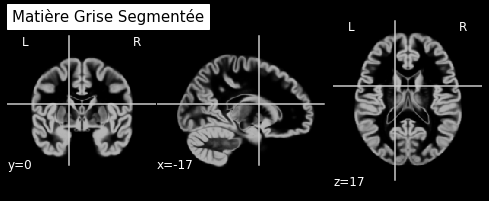

In [27]:
plot_anat(mni.gm, cut_coords=[-17, 0, 17], title='Matière Grise Segmentée')

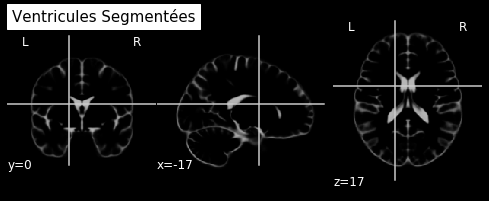

In [40]:
plot_anat(mni.csf, cut_coords=[-17, 0, 17], title='Ventricules Segmentées')